Name: Jie Lu; UNI: jl4961


Name: Mingyang Ni; UNI: mn2813

# Task 1 Visualization

### 1.1.0 Load Data

In [94]:
import numpy as np
from scipy.io import loadmat  
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import scipy.io as sio

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score

In [184]:
data = sio.loadmat('annthyroid.mat')

In [185]:
train=pd.DataFrame(data['X'])

In [186]:
y=pd.DataFrame(data['y'])

In [187]:
Y=data['y']
Y=Y.tolist()

y=[]
for l in Y:

    y.append(l[0])
target=y

In [188]:
X = pd.DataFrame(data['X'])
X.columns=['x1','x2','x3','x4','x5','x6']
y = pd.DataFrame(data['y'])
y.columns = ['y']
df = pd.concat([X, y], axis=1)

In [189]:
class0 = df[df['y']==0]
class1 = df[df['y']==1]

### 1.1.1 A simple scatter plot which does not seem to be useful

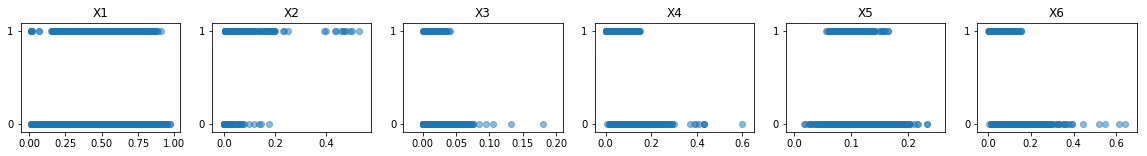

In [40]:
fig, axes = plt.subplots(1, 6, figsize=(20, 2))
for i, ax in enumerate(axes.ravel()):

    ax.scatter(X['x'+str(i+1)], y, alpha=.5)
    ax.set_title('X'+str(i+1))

### 1.1.2 Univaiate distribution

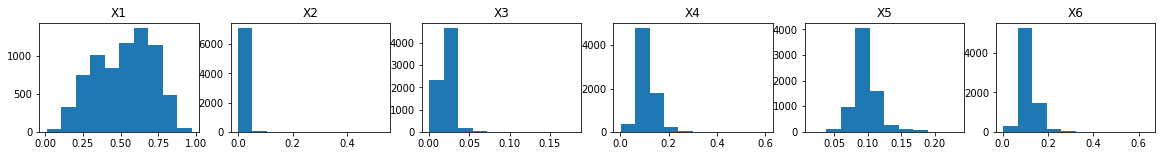

In [42]:
fig, axes = plt.subplots(1, 6, figsize=(20, 2))
for i, ax in enumerate(axes.ravel()):

    ax.hist(X['x'+str(i+1)])
    ax.set_title('X'+str(i+1))

### 1.1.3 Class wise univariate distribution

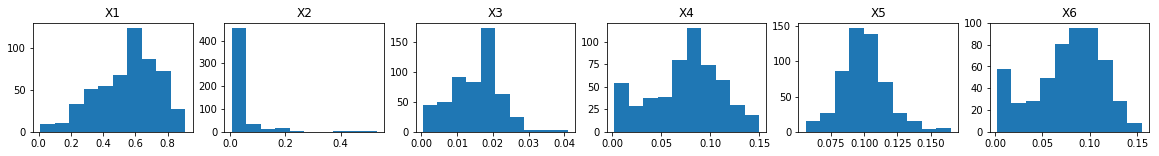

In [49]:
fig, axes = plt.subplots(1, 6, figsize=(20, 2))
for i, ax in enumerate(axes.ravel()):

    ax.hist(class1['x'+str(i+1)])
    ax.set_title('X'+str(i+1))

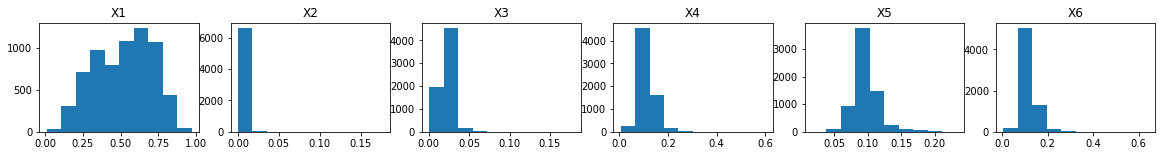

In [50]:
fig, axes = plt.subplots(1, 6, figsize=(20, 2))
for i, ax in enumerate(axes.ravel()):

    ax.hist(class0['x'+str(i+1)])
    ax.set_title('X'+str(i+1))

### 1.1.4  PCA-2 components

Text(0,0.5,'second principal component')

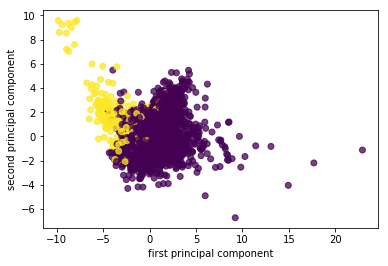

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler
pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pipe.fit_transform(X)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=data['y'].flatten(), alpha=.75)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

### 1.1.5 Colour graph of PCA

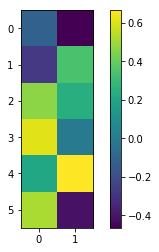

In [70]:
components = pipe.named_steps['pca'].components_
plt.imshow(components.T)
plt.colorbar()

### 1.1.6 variance ratio plot

Text(0.5,1,'explained variance ratio')

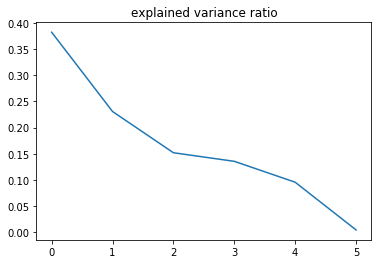

In [79]:
pipe = make_pipeline(StandardScaler(), PCA())
pipe.fit(X, y)
pca = pipe.named_steps['pca']
plt.plot(pca.explained_variance_ratio_)
plt.title("explained variance ratio")

We can observe that 5 makes a pretty good reduction in variance, after 5 there is not significant improvement has it is already at above 0.95

### 1.2  t-SNE plot for different perplexity

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


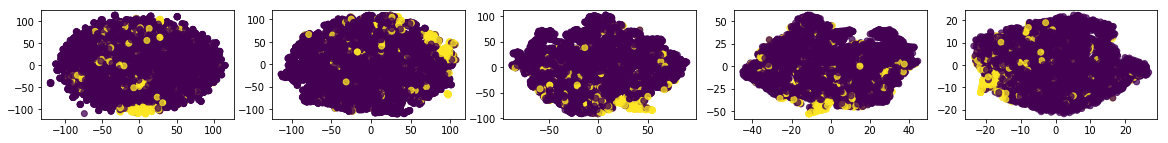

In [84]:
from sklearn.manifold import TSNE
fig, axes = plt.subplots(1, 5, figsize=(20, 2))
a=[2,5,20,100,300]
for i, ax in enumerate(axes.ravel()):
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(n_components=2,perplexity=a[i]))
    X_tsne_scaled = tsne_scaled.fit_transform(train)
    ax.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=data['y'].flatten(), alpha=.75)


We can observe that no matter how hard to tune the parameter, the t-SNE performs badly. It tells us model does matter a lot according to different data set. Some model simply does not work on certain data

# Task 2 Clustering

In [236]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from collections import Counter
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [95]:
def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.Vega10 if len(labels) <= 10 else plt.cm.Vega20
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

### 2.1.1 Kmeans ( we have combined 2.1 and 2.2 model wise to have better comparision)

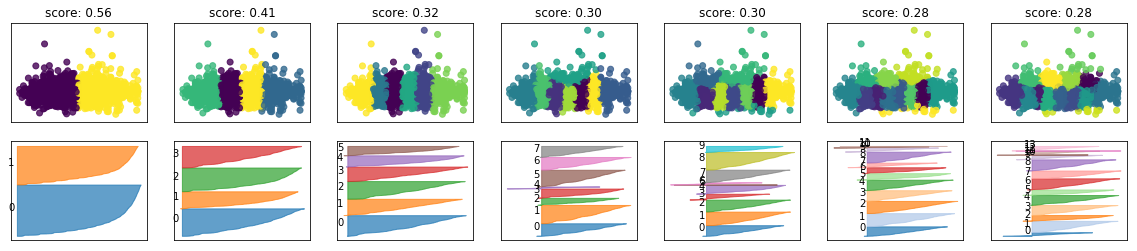

In [107]:
X_pca = PCA(n_components=2).fit_transform(X)
fig, axes = plt.subplots(2, 7, subplot_kw={'xticks': (), 'yticks':()}, figsize=(20, 4))
for ax, n_clusters in zip(axes.T, [2,4, 6, 8, 10,12,14]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, alpha=.8)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

From the plot and the silplot, we can see that cluster=2 works pretty well

### 2.2.1 supervised Kmeans

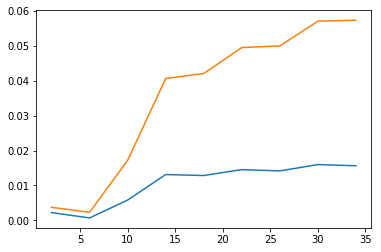

In [231]:
scoreami=[]
scorenmi=[]
for i in np.arange(2,38,4):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(X)
    a=adjusted_mutual_info_score(kmeans.labels_,data['y'].flatten())
    b=normalized_mutual_info_score(kmeans.labels_,data['y'].flatten())
    scoreami.append(a)
    scorenmi.append(b)
plt.plot(np.arange(2,38,4),scoreami)
plt.plot(np.arange(2,38,4),scorenmi)




We can observe here that cluster =30 works pretty well here. and we plot this below

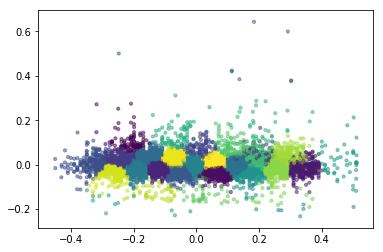

In [251]:
X_pca = PCA(n_components=2).fit_transform(X)
i=30
kmeans = KMeans(n_clusters=i)
kmeans = kmeans.fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=10,alpha=.5)

Simply frm this plot we cannot see much visually, but it may be able to find the outliers very effectively

### 2.1.2 DBSCAN

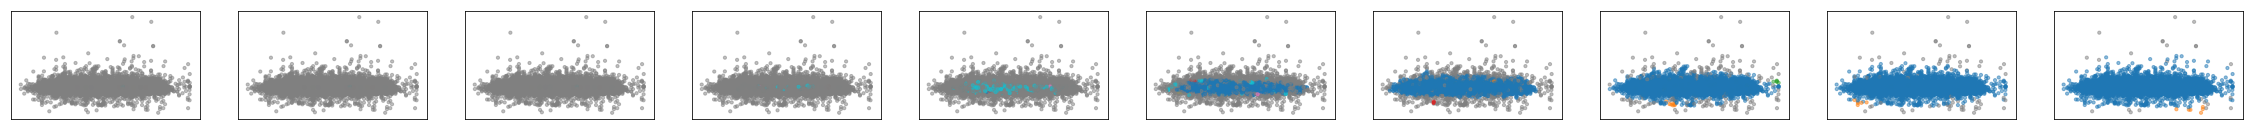

In [238]:

fig, axes = plt.subplots(1,10, subplot_kw={'xticks': (), 'yticks':()}, figsize=(40, 2))
axes = np.hstack([axes[:2], axes[2:]]).T
X_pca = PCA(n_components=2).fit_transform(X)
for ax, eps in zip(axes, np.logspace(-3,-1,10)):
    db = DBSCAN(eps=eps)
    db.fit(X)
    colors = plt.cm.Vega10(db.labels_)
    colors[db.labels_ == -1] = [.5, .5, .5, 1]
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10,alpha=.5)
  

Only from the plots it is hard for us to see the meaningful of the plots, however, if we have a basic understand of the data, the 8th plot looks pretty promising

In [243]:
print ('8th graph eps: {:.3f} '.format(np.logspace(-3,-1,10)[7]))

8th graph eps: 0.036 


### 2.2.2 Now the supervised DBSCAN

the optimal eps: 0.0215


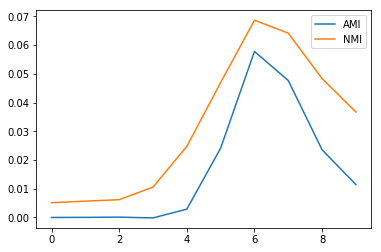

In [248]:
scoreami=[]
scorenmi=[]
for i in (np.logspace(-3,-1,10)):
    DB = DBSCAN(eps=i)
    db = DB.fit(X)
    a=adjusted_mutual_info_score(db.labels_,data['y'].flatten())
    b=normalized_mutual_info_score(db.labels_,data['y'].flatten())
    scoreami.append(a)
    scorenmi.append(b)
plt.plot(scoreami, label="AMI")
plt.plot(scorenmi, label="NMI")
plt.legend()
print("the optimal eps: {:.4f}".format(np.logspace(-3,-1,10)[6]))

We can see here that the 0.0215 eps performs pretty well and we plot the corresponding plot

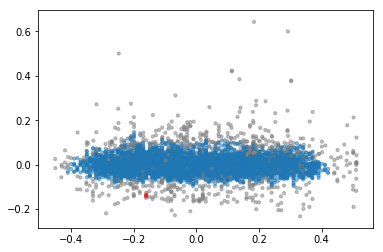

In [249]:
X_pca = PCA(n_components=2).fit_transform(X)
eps=0.0215
db = DBSCAN(eps=eps)
db.fit(X)
colors = plt.cm.Vega10(db.labels_)
colors[db.labels_ == -1] = [.5, .5, .5, 1]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=10,alpha=.5)

### 2.1.3 AgglomerativeClustering

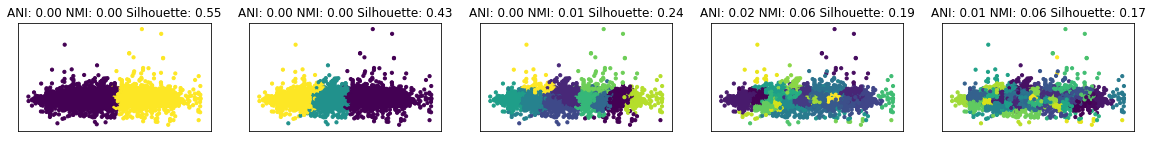

In [252]:
fig, axes = plt.subplots(1, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(20, 2))
agg1 = AgglomerativeClustering(n_clusters=2, connectivity=lambda x: kneighbors_graph(x, 10))
agg2 = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))
agg3 = AgglomerativeClustering(n_clusters=10, connectivity=lambda x: kneighbors_graph(x, 10))
agg4 = AgglomerativeClustering(n_clusters=30, connectivity=lambda x: kneighbors_graph(x, 10))
agg5 = AgglomerativeClustering(n_clusters=50, connectivity=lambda x: kneighbors_graph(x, 10))
for ax, alg in zip(axes.ravel(), [agg1,agg2,agg3,agg4,agg5]):
    alg.fit(X)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=alg.labels_, s=10)
    #ax.set_aspect("equal")
    a=adjusted_mutual_info_score(alg.labels_,data['y'].flatten())
    b=normalized_mutual_info_score(alg.labels_,data['y'].flatten())
    silhouette = silhouette_score(X, alg.labels_)
    ax.set_title("ANI: {:.2f} NMI: {:.2f} Silhouette: {:.2f}".format(a, b,silhouette))

We can observe that cluster 2 performs very well. 

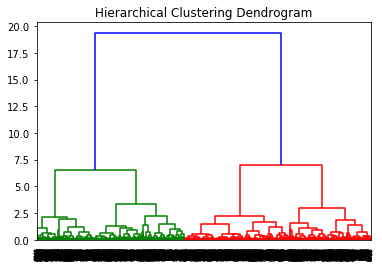

In [233]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X,'ward')
dendrogram(linkage_matrix,truncate_mode="level",p=12,show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

The dendrogram also agrees with our scatter plot. We can see that the first 2 decision account from most of the variance, we may account for another one, but it is not very significant.

### 2.2.3 From the supervised model, we have included the AMI NMI in the previous graph, we can see that cluster =30 performed best. Let's plot cluster=30 below

Text(0.5,1,'ANI: 0.01 NMI: 0.06 Silhouette: 0.17')

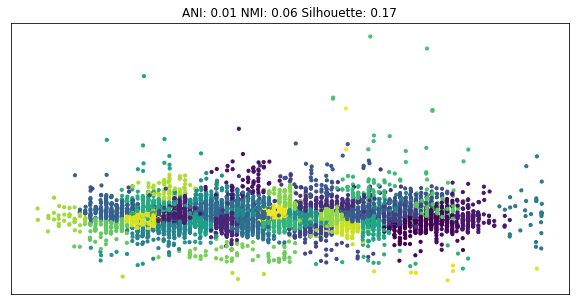

In [256]:
fig, axes = plt.subplots(1, 1, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))

agg4 = AgglomerativeClustering(n_clusters=30, connectivity=lambda x: kneighbors_graph(x, 10))


agg4.fit(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=alg.labels_, s=10)
#ax.set_aspect("equal")
a=adjusted_mutual_info_score(alg.labels_,data['y'].flatten())
b=normalized_mutual_info_score(alg.labels_,data['y'].flatten())
silhouette = silhouette_score(X, alg.labels_)
plt.title("ANI: {:.2f} NMI: {:.2f} Silhouette: {:.2f}".format(a, b,silhouette))

Although we cannot observe anything visually, it is statistically best

# Task 3 Outlier Detection

In [144]:
truelabel=[-1 if x==1 else x for x in data['y'].flatten()]

In [145]:
truelabel=[1 if x==0 else x for x in truelabel]

In [519]:
sum(target)/7200

0.07416666666666667

In [166]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold

### 3.1.1 EllipticaEnvelope

In [196]:

from sklearn.covariance import EllipticEnvelope
ell = EllipticEnvelope(contamination=0.0742)
ell.fit(X)
predell = ell.predict(X)
sum(predell == -1)  # Outlier points are predicted as -1
decision = ell.decision_function(X)
decision.min(), decision.max()


(-48.08220254564544, 4.365531720583324)

Text(0.5,1,'Silhouette: 0.15')

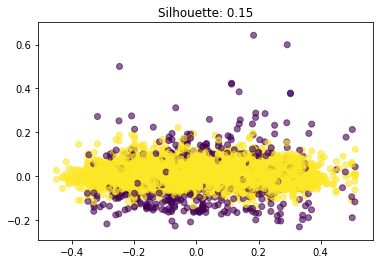

In [197]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predell, alpha = 0.6 )
silhouette = silhouette_score(X, predell)
plt.title("Silhouette: {:.2f}".format(silhouette))

### 3.1.2 OneClassSVM

In [198]:
from sklearn.svm import OneClassSVM

In [199]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
clf = OneClassSVM(nu=0.0742, kernel="rbf", gamma=0.1)
clf.fit(X_scaled)
predclf = clf.predict(X_scaled)
print(sum(predclf==-1))

531


### 3.1.2.1 OneClassSVM without scaling

Text(0.5,1,'Silhouette: 0.25')

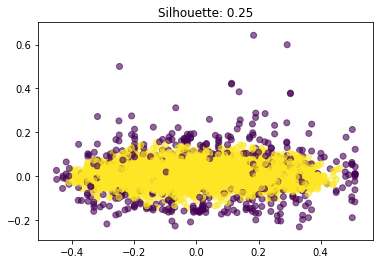

In [202]:
X_pca = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1], c= predclf, alpha = 0.6)
silhouette = silhouette_score(X, predclf)
plt.title("Silhouette: {:.2f}".format(silhouette))

### 3.1.2.2 OneClassSVM with scaling

Text(0.5,1,'Silhouette: 0.25')

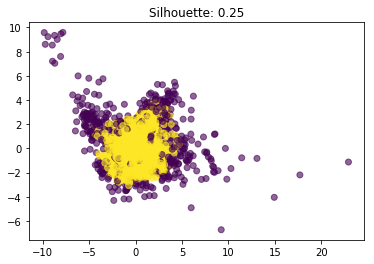

In [200]:
X_scaled_pca = PCA(n_components = 2).fit_transform(X_scaled)
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1], c= predclf, alpha = 0.6)
silhouette = silhouette_score(X, predclf)
plt.title("Silhouette: {:.2f}".format(silhouette))

### 3.1.3 Isolation Forest

In [207]:
forest = IsolationForest(contamination= 0.0742).fit(X)
predtree = forest.predict(X)

print(sum(predtree == -1))

535


Text(0.5,1,'Silhouette: 0.21')

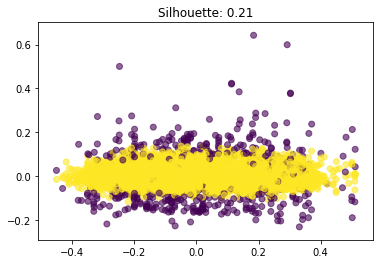

In [208]:
X_pca = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1], c= predtree, alpha = 0.6)
silhouette = silhouette_score(X, predtree)
plt.title("Silhouette: {:.2f}".format(silhouette))

In [206]:
forest_scaled = IsolationForest(contamination= 0.0742).fit(X_scaled)
predtree = forest_scaled.predict(X)
print(sum(predtree == -1))

0


So, it turns out that we should not scale for an isolation forest

From the above plot, i feel that the one class svm with sacling did a pretty decent job. The absolue distance of the outliers from the inliers is larger as compared to other models

### 3.2  AUC, average precision

In [216]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

In [229]:

auc_ell = roc_auc_score(truelabel, ell.decision_function(X))
auc_clf = roc_auc_score(truelabel, clf.decision_function(X_scaled))
auc_forest = roc_auc_score(truelabel, forest.decision_function(X))
pre_ell = average_precision_score(truelabel, ell.decision_function(X))
pre_clf = average_precision_score(truelabel, clf.decision_function(X_scaled))
pre_forest = average_precision_score(truelabel, forest.decision_function(X))

In [230]:
print("ell auc: {:.2f}".format(auc_ell))
print("clf auc: {:.2f}".format(auc_clf))
print("forest auc: {:.2f}".format(auc_forest))
print("ell precision: {:.2f}".format(pre_ell))
print("clf precision: {:.2f}".format(pre_ell))
print("forest precision: {:.2f}".format(pre_ell))

ell auc: 0.92
clf auc: 0.60
forest auc: 0.86
ell precision: 0.99
clf precision: 0.99
forest precision: 0.99


We can see that all 3 model did well in precision. However, ellipticEnvelop did the best in terms of auc

All 3 models have a very high precision, this can be due to the fact the data set is imbalanced. Furthermore, the auc is able to tell us how well the model performs in terms of false negative and true positive rate, ELL clearly did best. It can identify most of the points correcly

# Task 4 Imbalanced Classification

In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [3]:
# ravel y for label shape

data = sio.loadmat('annthyroid.mat')
X = data['X']
y = data['y'].ravel()

### 4.1.1 Basic Logistic regression with imbalanced data (No GridSearch)

In [4]:
lr =  LogisticRegression()
lr_score = cross_validate(lr, X, y, cv=10, 
                          scoring = ("roc_auc", 'average_precision'),
                         return_train_score=True)

In [5]:
print("AUC logistic train:{:.4f}".format(np.mean(lr_score['train_roc_auc'])))
print("average_precision logistic train:{:.4f}".format(np.mean(lr_score['train_average_precision'])),'\n')
print("*** AUC logistic test:{:.4f}".format(np.mean(lr_score['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(lr_score['test_average_precision'])))

AUC logistic train:0.8338
average_precision logistic train:0.4876 

*** AUC logistic test:0.8328
*** average_precision logistic test:0.4950


### 4.1.2 Logistic regression with imbalanced data 

In [6]:
#logistic regression sensitive to scale

lr_pipeline_imb = make_pipeline(StandardScaler(), 
                            LogisticRegression())

lr_pipe_imb = GridSearchCV(lr_pipeline_imb, 
                           dict(logisticregression__C = np.logspace(-2, 2, 10)))

lr_score_imb = cross_validate(lr_pipe_imb, X, y, cv=10, 
                          scoring = ("roc_auc", 'average_precision'),
                         return_train_score=True)

In [7]:
print("AUC logistic train:{:.4f}".format(np.mean(lr_score_imb['train_roc_auc'])))
print("average_precision logistic train:{:.4f}".format(np.mean(lr_score_imb['train_average_precision'])),'\n')
print("*** AUC logistic test:{:.4f}".format(np.mean(lr_score_imb['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(lr_score_imb['test_average_precision'])))

AUC logistic train:0.9761
average_precision logistic train:0.7690 

*** AUC logistic test:0.9736
*** average_precision logistic test:0.7674


### 4.1.3 Logistic regression with random under sampling

In [8]:
lr_pipeline_under = make_imb_pipeline(RandomUnderSampler(), StandardScaler(), LogisticRegression())

lr_pipe_under = GridSearchCV(lr_pipeline_under,
                          dict(logisticregression__C = np.logspace(-2, 2, 10)))

lr_score_under = cross_validate(lr_pipe_under, X, y, cv=10,
                                scoring = ["roc_auc", 'average_precision'],
                                return_train_score=True)

In [9]:
print("AUC logistic train:{:.4f}".format(np.mean(lr_score_under['train_roc_auc'])))
print("average_precision logistic train:{:.4f}".format(np.mean(lr_score_under['train_average_precision'])),'\n')
print("*** AUC logistic test:{:.4f}".format(np.mean(lr_score_under['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(lr_score_under['test_average_precision'])))

AUC logistic train:0.9885
average_precision logistic train:0.8207 

*** AUC logistic test:0.9880
*** average_precision logistic test:0.8262


As our very first balanced classification result, compared with task 3. It has a better AUC, but a worse average_precision.

### 4.1.4 Logistic regression with random over sampling

In [10]:
lr_pipeline_over = make_imb_pipeline(RandomOverSampler(), StandardScaler(), LogisticRegression())

lr_pipe_over = GridSearchCV(lr_pipeline_over,
                          dict(logisticregression__C = np.logspace(-2, 2, 10)))

lr_score_over = cross_validate(lr_pipe_over, X, y, cv=10,
                                scoring = ["roc_auc", 'average_precision'],
                                return_train_score=True)


In [11]:
print("AUC logistic train:{:.4f}".format(np.mean(lr_score_over['train_roc_auc'])))
print("average_precision logistic train:{:.4f}".format(np.mean(lr_score_over['train_average_precision'])),'\n')
print("*** AUC logistic test:{:.4f}".format(np.mean(lr_score_over['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(lr_score_over['test_average_precision'])))

AUC logistic train:0.9890
average_precision logistic train:0.8242 

*** AUC logistic test:0.9887
*** average_precision logistic test:0.8299


### 4.1.5 Logistic regression with SMOTE

In [12]:
lr_pipeline_smote = make_imb_pipeline(SMOTE(), StandardScaler(), LogisticRegression())

lr_pipe_smote = GridSearchCV(lr_pipeline_smote,
                          dict(logisticregression__C = np.logspace(-2, 2, 10)))

lr_score_smote = cross_validate(lr_pipe_smote, X, y, cv=10,
                                scoring = ["roc_auc", 'average_precision'],
                                return_train_score=True)

In [13]:
print("AUC logistic train:{:.4f}".format(np.mean(lr_score_smote['train_roc_auc'])))
print("average_precision logistic train:{:.4f}".format(np.mean(lr_score_smote['train_average_precision'])),'\n')
print("*** AUC logistic test:{:.4f}".format(np.mean(lr_score_smote['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(lr_score_smote['test_average_precision'])))

AUC logistic train:0.9890
average_precision logistic train:0.8241 

*** AUC logistic test:0.9886
*** average_precision logistic test:0.8294


We can see over sample or under sample to achieve a balanced data doesn't make much difference.

### 4.2.1 Basic Random Forest with imbalanced data (No GridSearch)

In [14]:
rfc = RandomForestClassifier()

rfc_score = cross_validate(rfc, X, y, cv=10, 
                          scoring = ("roc_auc", 'average_precision'),
                         return_train_score=True)

In [15]:
print("AUC rf train:{:.4f}".format(np.mean(rfc_score['train_roc_auc'])))
print("average_precision rf train:{:.4f}".format(np.mean(rfc_score['train_average_precision'])),'\n')
print("*** AUC rf test:{:.4f}".format(np.mean(rfc_score['test_roc_auc'])))
print("*** average_precision rf test:{:.4f}".format(np.mean(rfc_score['test_average_precision'])))

AUC rf train:1.0000
average_precision rf train:0.9998 

*** AUC rf test:0.9943
*** average_precision rf test:0.9049


### 4.2.2 Random Forest with imbalanced data

In [16]:
#logistic regression sensitive to scale
param_grid_rf = {'n_estimators':[50, 100, 200],
                 'min_samples_split':[2, 3, 4, 5, 10]}

rf = GridSearchCV(RandomForestClassifier() ,param_grid_rf)
rf_score = cross_validate(rf, X, y, cv=5, scoring = ["roc_auc", 'average_precision'],
                         return_train_score=True)

In [17]:
print("AUC rf train:{:.4f}".format(np.mean(rf_score['train_roc_auc'])))
print("average_precision rf train:{:.4f}".format(np.mean(rf_score['train_average_precision'])),'\n')
print("*** AUC rf test:{:.4f}".format(np.mean(rf_score['test_roc_auc'])))
print("*** average_precision rf test:{:.4f}".format(np.mean(rf_score['test_average_precision'])))

AUC rf train:1.0000
average_precision rf train:0.9998 

*** AUC rf test:0.9955
*** average_precision rf test:0.9234


### 4.2.3 Random Forest with random under sampling 

In [18]:
rfc_pipe_under = make_imb_pipeline(RandomUnderSampler(),RandomForestClassifier())

rf_pipe_under = GridSearchCV(rfc_pipe_under, dict(randomforestclassifier__n_estimators = [50, 100, 200],
                                                  randomforestclassifier__min_samples_split =[2, 3, 4, 5, 10]))

rf_score_under = cross_validate(rf_pipe_under, X, y, cv=5, scoring = ["roc_auc", 'average_precision'],
                              return_train_score=True)

In [19]:
print("AUC rf train:{:.4f}".format(np.mean(rf_score_under['train_roc_auc'])))
print("average_precision rf train:{:.4f}".format(np.mean(rf_score_under['train_average_precision'])),'\n')
print("*** AUC rf test:{:.4f}".format(np.mean(rf_score_under['test_roc_auc'])))
print("*** average_precision logistic test:{:.4f}".format(np.mean(rf_score_under['test_average_precision'])))

AUC rf train:0.9968
average_precision rf train:0.9405 

*** AUC rf test:0.9935
*** average_precision logistic test:0.8787


Under sample for forest didn't make much difference, and lead to a slightly lower average_precision.

### 4.2.4 Random Forest with random over sampling 

In [20]:
rfc_pipe_over = make_imb_pipeline(RandomOverSampler(),RandomForestClassifier())

rf_pipe_over = GridSearchCV(rfc_pipe_over, dict(randomforestclassifier__n_estimators = [50, 100, 200],
                                                  randomforestclassifier__min_samples_split =[2, 3, 4, 5, 10]))

rf_score_over = cross_validate(rf_pipe_over, X, y, cv=5, scoring = ["roc_auc", 'average_precision'],
                              return_train_score=True)

In [23]:
print("AUC rf train:{:.4f}".format(np.mean(rf_score_over['train_roc_auc'])))
print("average_precision rf train:{:.4f}".format(np.mean(rf_score_over['train_average_precision'])),'\n')
print("*** AUC rf test:{:.4f}".format(np.mean(rf_score_over['test_roc_auc'])))
print("*** average_precision rf test:{:.4f}".format(np.mean(rf_score_over['test_average_precision'])))

AUC rf train:1.0000
average_precision rf train:1.0000 

*** AUC rf test:0.9953
*** average_precision rf test:0.9152


### 4.2.5 Random Forest with SMOTE

In [24]:
rfc_pipe_smote = make_imb_pipeline(SMOTE(),RandomForestClassifier())

rf_pipe_smote = GridSearchCV(rfc_pipe_smote, dict(randomforestclassifier__n_estimators = [50, 100, 200],
                                                  randomforestclassifier__min_samples_split =[2, 3, 4, 5, 10]))

rf_score_smote = cross_validate(rf_pipe_smote, X, y, cv=5, scoring = ["roc_auc", 'average_precision'],
                              return_train_score=True)

In [25]:
print("AUC rf train:{:.4f}".format(np.mean(rf_score_smote['train_roc_auc'])))
print("average_precision rf train:{:.4f}".format(np.mean(rf_score_smote['train_average_precision'])),'\n')
print("*** AUC rf test:{:.4f}".format(np.mean(rf_score_smote['test_roc_auc'])))
print("*** average_precision rf test:{:.4f}".format(np.mean(rf_score_smote['test_average_precision'])))

AUC rf train:1.0000
average_precision rf train:1.0000 

*** AUC rf test:0.9948
*** average_precision rf test:0.9113


For random forest, in this case, over sample behaves better than under sample, but both almost have no difference with the imbalanced data.

### For logistic regression, when changing to balanced data, the average precision and AUC will both slightly improve

### For random forest, when changing to balanced data, both metrics will behave almost the same.

### Compared with Task 3 results, they both have a lower average precision, but a higher AUC.